# <span style="text-decoration: underline">AOS 51 Lab: Data Analysis for Climate Science, Session #4</span>
# <span>🌎🔥 👩🏿‍💻👩🏾‍💻 👨🏽‍💻👩🏼‍💻 👨🏼‍💻👨🏾‍💻👩🏽‍💻 👨🏿‍💻</span>

In this lab, we will enter the world of multi-dimensional data using `xarray` and learn how to make maps using `cartopy`.

---

In [4]:
# import all the packages we need
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# NetCDF Data

### What does netCDF mean?

**Net**work **C**ommon **D**ata **F**orm (or [netCDF](https://en.wikipedia.org/wiki/NetCDF)) is a set of software libraries to manipulate array-oriented (i.e. multi-dimensional) weather and climate data. netCDF files all end with the extension ".nc".


### Opening and reading netCDF files
We'll be working with a file called `skt_sfc_mon_mean_1998_2017.nc`. This file is from the [NCEP-DOE 2 Reanalysis](https://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis2.gaussian.html) and contains global monthly-mean skin-temperature at the surface from January 1998 - December 2017.

Replace "nberg" with your username in the path below to load the netcdf file. 

In [3]:
ncfile = xr.open_dataset('/Users/nberg/AOS51/data/skt_sfc_mon_mean_1998_2017.nc')
ncfile

<xarray.Dataset>
Dimensions:    (lat: 94, lon: 192, nbnds: 2, time: 240)
Coordinates:
  * lat        (lat) float32 -88.542 -86.6531 -84.7532 -82.8508 -80.9473 ...
  * lon        (lon) float32 0.0 1.875 3.75 5.625 7.5 9.375 11.25 13.125 ...
  * time       (time) datetime64[ns] 1998-01-01 1998-02-01 1998-03-01 ...
Dimensions without coordinates: nbnds
Data variables:
    skt        (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) float64 ...
Attributes:
    Conventions:               CF-1.0
    title:                     Monthly NCEP/DOE Reanalysis 2
    history:                   Thu May 17 17:38:09 2018: ncpdq -a -lat skt_sf...
    comments:                  Data is from \nNCEP/DOE AMIP-II Reanalysis (Re...
    platform:                  Model
    source:                    NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Model
    institution:               National Centers for Environmental Prediction
    dataset_title:             NCEP-DOE AMIP-II Reanalysis
    References:      

### Structure of netCDF data

Data in netCDF files are divided by:

* **dimensions** - spatial (e.g. `latitude` and `longitude`) and temporal (e.g. `time`) dimensions 
* **variables** - climate variables in contained in the file (e.g. `skt`)
* **attributes** - metadata to the file itself, and for a given variable (e.g. the units of a variable)
* **coordinates** (these are of secondary importance to us for now) 

# Extracting variables

We can extract variables from an xarray Dataset with similar syntax as extracting columns from a Pandas Dataframe.

Note how the data format changes from a `Dataset` (multiple variables) to a `DataArray` (single variable). 

In [9]:
skt = ncfile['skt']
skt

<xarray.DataArray 'skt' (time: 240, lat: 94, lon: 192)>
[4331520 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -88.542 -86.6531 -84.7532 -82.8508 -80.9473 ...
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 9.375 11.25 13.125 15.0 ...
  * time     (time) datetime64[ns] 1998-01-01 1998-02-01 1998-03-01 ...
Attributes:
    long_name:             Monthly Mean of Forecast of SST/Land Skin Temperat...
    valid_range:           [-32765  -1765]
    unpacked_valid_range:  [ 120.  430.]
    actual_range:          [ 190.85420227  314.58322144]
    units:                 degK
    precision:             2
    GRIB_id:               11
    GRIB_name:             TMP
    var_desc:              Skin Temperature
    dataset:               NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly...
    level_desc:            Surface
    statistic:             Individual Obs
    parent_stat:           Other
    standard_name:         temperature
    cell_methods:          time: mean 

### Slicing/selecting data by dimension labels

We can subset data using dimension names and values using the `sel` command. 

In [10]:
# Select a single time:
skt.sel(time='2005-06')

<xarray.DataArray 'skt' (time: 1, lat: 94, lon: 192)>
array([[[ 227.429993,  227.300003, ...,  227.699997,  227.559998],
        [ 229.279999,  229.      , ...,  229.880005,  229.569992],
        ..., 
        [ 271.97998 ,  271.98999 , ...,  271.910004,  271.950012],
        [ 271.869995,  271.869995, ...,  271.859985,  271.859985]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -88.542 -86.6531 -84.7532 -82.8508 -80.9473 ...
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 9.375 11.25 13.125 15.0 ...
  * time     (time) datetime64[ns] 2005-06-01
Attributes:
    long_name:             Monthly Mean of Forecast of SST/Land Skin Temperat...
    valid_range:           [-32765  -1765]
    unpacked_valid_range:  [ 120.  430.]
    actual_range:          [ 190.85420227  314.58322144]
    units:                 degK
    precision:             2
    GRIB_id:               11
    GRIB_name:             TMP
    var_desc:              Skin Temperature
    dataset:               NCEP/D

In [11]:
# Select a single time, lat, and lon
# Note how we need to include the method='nearest' argument, e.g. find the grid cell nearest to 37 degN, 235 degE
skt.sel(time='2010-01', lat=37, lon=235, method='nearest')

<xarray.DataArray 'skt' (time: 1)>
array([ 286.26001], dtype=float32)
Coordinates:
    lat      float32 37.1422
    lon      float32 234.375
  * time     (time) datetime64[ns] 2010-01-01
Attributes:
    long_name:             Monthly Mean of Forecast of SST/Land Skin Temperat...
    valid_range:           [-32765  -1765]
    unpacked_valid_range:  [ 120.  430.]
    actual_range:          [ 190.85420227  314.58322144]
    units:                 degK
    precision:             2
    GRIB_id:               11
    GRIB_name:             TMP
    var_desc:              Skin Temperature
    dataset:               NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly...
    level_desc:            Surface
    statistic:             Individual Obs
    parent_stat:           Other
    standard_name:         temperature
    cell_methods:          time: mean (monthly of 6-hourly values)

In [12]:
# Select a slice of labels 
# Now, we don't need to include the method='nearest' command when slicing a range of lat/lon labels
skt.sel(time=slice('2010-01','2014-12'), lat=slice(25,45))

<xarray.DataArray 'skt' (time: 60, lat: 11, lon: 192)>
[126720 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 25.7139 27.6186 29.5234 31.4281 33.3328 35.2375 ...
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 9.375 11.25 13.125 15.0 ...
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 2010-03-01 ...
Attributes:
    long_name:             Monthly Mean of Forecast of SST/Land Skin Temperat...
    valid_range:           [-32765  -1765]
    unpacked_valid_range:  [ 120.  430.]
    actual_range:          [ 190.85420227  314.58322144]
    units:                 degK
    precision:             2
    GRIB_id:               11
    GRIB_name:             TMP
    var_desc:              Skin Temperature
    dataset:               NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly...
    level_desc:            Surface
    statistic:             Individual Obs
    parent_stat:           Other
    standard_name:         temperature
    cell_methods:          time: mea

In [13]:
# Select a slice of times and a single lat/lon 
# Need to do this in two selecting commands:
ncfile['skt'].sel(time=slice('2010-01','2014-12')).sel(lat=45.1, lon=200.5, method='nearest')

<xarray.DataArray 'skt' (time: 60)>
array([ 280.73999 ,  280.330017,  280.080017,  280.109985,  280.660004,
        282.049988,  286.5     ,  289.48999 ,  290.27002 ,  285.119995,
        282.470001,  281.529999,  280.669983,  280.690002,  280.429993,
        280.649994,  281.399994,  282.910004,  288.039978,  292.220001,
        288.539978,  285.640015,  284.27002 ,  283.220001,  281.570007,
        281.160004,  280.589996,  280.369995,  281.      ,  281.919983,
        286.299988,  288.339996,  288.880005,  285.059998,  283.429993,
        282.099976,  281.      ,  280.869995,  280.52002 ,  281.209991,
        283.089996,  284.109985,  287.02002 ,  289.419983,  288.959991,
        287.700012,  285.859985,  284.619995,  283.190002,  281.789978,
        281.089996,  281.179993,  281.399994,  283.649994,  285.720001,
        288.119995,  289.459991,  287.179993,  283.899994,  282.029999], dtype=float32)
Coordinates:
    lat      float32 44.7611
    lon      float32 200.625
  * time     

---
<span style="color:red; font-size:20px; font-weight:bold">In-class exercise</span>

1. Subset 2000-2005 skin temperature at the grid cell nearest to Seattle, WA (47.6 N, 237.7 E).
2. Subset November 1999 skin temperature for latitude nearest to 35 degrees N and all longitudes. 
3. Subset 2015-2017 skin temperature for latitudes within 10-20 degrees N and longitude 90-130 degrees E. 
---

### Simple xarray plotting

xarray also has simple, yet powerful, [plotting capabilities](https://xarray.pydata.org/en/stable/plotting.html) build on top of matplotlib. 

Now we get to play around with [colormaps](https://matplotlib.org/examples/color/colormaps_reference.html).

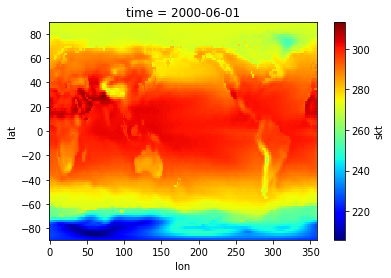

In [16]:
# Skin temperature map on 2000-06-01
skt.sel(time='2000-06-01').plot(cmap='jet')

<span style="color:red; font-size:20px; font-weight:bold">In-class exercise</span>

Extract skin temperature on August 2010 and make a global map of it.

### Standard Statistics

Like Pandas, we can quickly compute the mean, min, max, standard deviation, etc:

In [18]:
# Average across all dimensions (empty parentheses)
skt.mean()

# Average across a specific dimension: .mean(dim=['name of dimension'])
skt.mean(dim='time')

# Maximums across the lat and lon dimensions
skt.max(dim='lat').max(dim='lon')

# Minimum across the entire time series for a subsetted location (Seattle)
skt.sel(lat=47.6, lon=237.7, method='nearest').min(dim='time')

<xarray.DataArray 'skt' ()>
array(270.17999267578125)
Coordinates:
    lat      float32 46.6658
    lon      float32 238.125

<span style="color:red; font-size:20px; font-weight:bold">In-class exercise</span>

Compute the maximum monthly temperature during the entire time series for the grid cell nearest to San Francisco (37.8 N, 237.6 E).

Bonus: convert the value from degrees K to degrees Fahrenheit.

### Resampling to a new temporal frequency

Just like Pandas, we can use the `resample` command to quickly translate monthly data to annual data, for example. 

In [25]:
# Resample monthly to annual data and compute annual-means
skt.resample(time='AS').mean(dim='time')

<xarray.DataArray 'skt' (time: 20, lat: 94, lon: 192)>
array([[[ 229.554993,  229.385849, ...,  229.896667,  229.72583 ],
        [ 231.493347,  231.104172, ...,  232.280823,  231.886673],
        ..., 
        [ 256.226624,  255.869156, ...,  256.215851,  256.2258  ],
        [ 255.885864,  255.646667, ...,  255.669998,  255.669174]],

       [[ 229.291687,  229.111679, ...,  229.645828,  229.467484],
        [ 231.484146,  231.09082 , ...,  232.268356,  231.875839],
        ..., 
        [ 257.089996,  257.004181, ...,  257.009979,  257.053314],
        [ 256.615021,  256.749176, ...,  256.729156,  256.415802]],

       ..., 
       [[ 230.455856,  230.307495, ...,  230.748337,  230.601669],
        [ 232.018356,  231.640823, ...,  232.786682,  232.397507],
        ..., 
        [ 259.7883  ,  259.863373, ...,  259.60498 ,  259.659119],
        [ 259.640839,  259.742493, ...,  259.706665,  259.630005]],

       [[ 228.914993,  228.73584 , ...,  229.277512,  229.095825],
        [ 230

<span style="color:red; font-size:20px; font-weight:bold">In-class exercise</span>

* Resample `skt` from monthly to annual frequency and compute the maximum annual temperatures for each grid cell.
* Slice out the maximum annual temperature for 2015 and make a global map of it

### Groupby 

`groupby` is similar to `resample`, but is even more flexible and powerful. It offers us a way to quickly generate monthly and seasonal statistics.

In [27]:
# Monthly climatologies
monthly_means = skt.groupby('time.month').mean(dim='time')
# print(monthly_means)

# Extract July and October climatologies 
# Note: Month integers start at 1 not zero when using groupby
skt_july_clim = monthly_means.sel(month=7) 
skt_oct_clim = monthly_means.sel(month=10)
#print(skt_oct_clim)

In [28]:
# Seasonal means
# Note the *new dimension* called season (came from old dimension of time)
seasonal_means = skt.groupby('time.season').mean(dim='time')
print(seasonal_means)

<xarray.DataArray 'skt' (season: 4, lat: 94, lon: 192)>
array([[[ 240.672363,  240.536636, ...,  240.948807,  240.809677],
        [ 242.376465,  242.044327, ...,  243.048508,  242.710693],
        ..., 
        [ 246.949799,  247.030823, ...,  246.83316 ,  246.947723],
        [ 246.211212,  246.405182, ...,  246.361679,  246.160324]],

       [[ 222.361069,  222.170639, ...,  222.737778,  222.5495  ],
        [ 224.456146,  224.025146, ...,  225.316833,  224.88649 ],
        ..., 
        [ 271.580139,  271.600494, ...,  271.562012,  271.579834],
        [ 271.607971,  271.669312, ...,  271.65799 ,  271.604492]],

       [[ 224.402328,  224.190979, ...,  224.822296,  224.613907],
        [ 226.701553,  226.214661, ...,  227.667023,  227.187103],
        ..., 
        [ 254.231796,  254.262497, ...,  254.168854,  254.254654],
        [ 254.040985,  254.142868, ...,  254.114838,  254.016632]],

       [[ 228.644669,  228.473846, ...,  228.987793,  228.815536],
        [ 230.367981,  22

In [23]:
# Extracting a single season
skt_djf = seasonal_means.sel(season='DJF')
#print(skt_djf)

<span style="color:red; font-size:20px; font-weight:bold">In-class exercise</span>

* Slice out 2001-2010 data from the entire timeseries
* Compute each seasonal-mean temperature during that 10-year span
* Plot summer (JJA) seasonal-mean temperature

# Cartopy 

[Cartopy](https://scitools.org.uk/cartopy/docs/latest/) is a Python package designed for geospatial data processing in order to produce maps and other geospatial data analyses.

### Setup

We generally want to display state/province boundaries in our maps. To do that, we first need to load built-in shapefiles containing these boundaries:

In [32]:
# Adding State/Province boundaries with built-in Cartopy features
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

With the boundaries loaded, we can return to `matplotlib` and follow the usual plot creation steps:

* Creating a figure canvas that will contain our map(s)
   * `fig = plt.figure(figsize=(8,4))`
* Adding a subplot to the figure canvas, establish the subplot grid (row #, col #, subplot #), and define our axes to be a GeoAxes using the [PlateCarree](https://en.wikipedia.org/wiki/Equirectangular_projection) map projection
   * `ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())`

Then, we need to create a geo-axes with a defined map projection and overlay state boundaries along with coastlines and geographic borders. 

* Overlay boundaries
   * `ax.coastlines(resolution='50m')` (can be 110, 50, or 10m resolution; can also specify the color) 
   * `ax.gridlines(draw_labels=True)`
   * `ax.add_feature(states_provinces, edgecolor='black')`
   * `ax.add_feature(cfeature.BORDERS)`

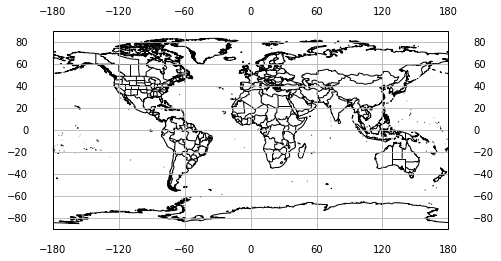

In [4]:
# Most basic map: no data, just display the PlateCarree projection 
fig = plt.figure(figsize=(8,4))

ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m') #can be 110, 50, or 10m resolution; can also specify the color 
ax.gridlines(draw_labels=True)
ax.add_feature(states_provinces, edgecolor='black')
ax.add_feature(cfeature.BORDERS)

### Mapping climate data

Let's make maps of skin temperature data from the NCEP-DOE II reanalyses. 

In [64]:
# Change the path to wherever you have stored this netcdf file
ncfile = xr.open_dataset('/Users/nberg/AOS51/data/skt_sfc_mon_mean_1998_2017.nc')
skt = ncfile['skt'] # extract skin temperature 
skt_avg = skt.mean(dim='time') # calculate the temporal average
skt_avg

<xarray.DataArray 'skt' (lat: 94, lon: 192)>
array([[ 229.02005 ,  228.843018,  228.665039, ...,  229.550613,  229.374283,
         229.197113],
       [ 230.975601,  230.553925,  230.133957, ...,  232.236679,  231.817932,
         231.397141],
       [ 232.157913,  231.545944,  230.939285, ...,  234.02504 ,  233.397858,
         232.77594 ],
       ..., 
       [ 257.530334,  257.668549,  257.76062 , ...,  257.194214,  257.293274,
         257.450867],
       [ 257.464294,  257.507355,  257.568878, ...,  257.281158,  257.344269,
         257.428772],
       [ 257.142639,  257.287567,  257.277771, ...,  257.226166,  257.262543,
         257.10553 ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -88.542 -86.6531 -84.7532 -82.8508 -80.9473 ...
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 9.375 11.25 13.125 15.0 ...

With a 2D (lat x lon) dataset of temperature, we can make a map!

### Contouring and filling data over the map (contourf)

Text(0.5,1,'SKT contours')

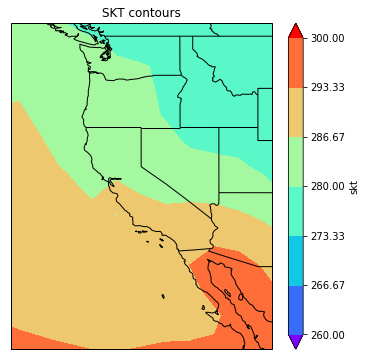

In [34]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())

# Contour and fill average skin temperature
# vmin and vmax set the min/max values on the colorbar 
skt_avg.plot.contourf(ax=ax, 
                      transform=ccrs.PlateCarree(), 
                      cmap='rainbow', 
                      vmin=260, vmax=300)

# zoom in over the Western US by setting(x0, x1, y0, y1) of the map in the given coordinate system.
ax.set_extent([230,250,25,50]) 

# Overlay the coastlines/boundaries/borders
ax.coastlines('50m')
ax.add_feature(states_provinces, edgecolor='black')
ax.add_feature(cfeature.BORDERS)
ax.set_title('SKT contours')

### Grid-cell colormesh over the map (pcolormesh)

To not smooth across pixels and instead display each pixel's value, we can use `pcolormesh` instead of `contourf`:

Text(0.5,1,'SKT colormesh')

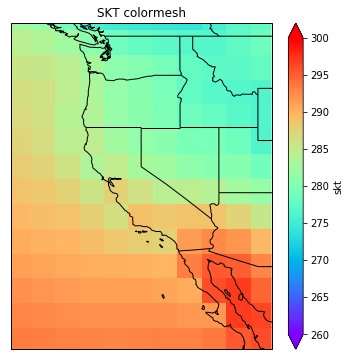

In [35]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())

# Pixelated map using pcolormesh instead of contourf
skt_avg.plot.pcolormesh(ax=ax, 
                        transform=ccrs.PlateCarree(), 
                        cmap='rainbow', 
                        vmin=260, vmax=300)

ax.set_extent([230,250,25,50])
ax.coastlines('50m')
ax.add_feature(states_provinces, edgecolor='black')
ax.add_feature(cfeature.BORDERS)
ax.set_title('SKT colormesh')

<span style="color:red; font-size:20px; font-weight:bold">In-class exercise</span>

1. Resample the monthly-mean skin temperature data to annual-means.
2. Extract 2001-2010 data and compute the 10-year average.
3. Create a map showing 2001-2010 average skin temperature across the globe. 

### Multi-panel maps

For multi-panel maps, we simply need to define multiple axes (`ax`) as we would normally do in matplotlib.

In [37]:
# Compute DJF and JJA average temperatures
skt_djf_avg = skt.groupby('time.season').mean('time').sel(season='DJF')
skt_jja_avg = skt.groupby('time.season').mean('time').sel(season='JJA')

Text(0.5,1,'SKT JJA average')

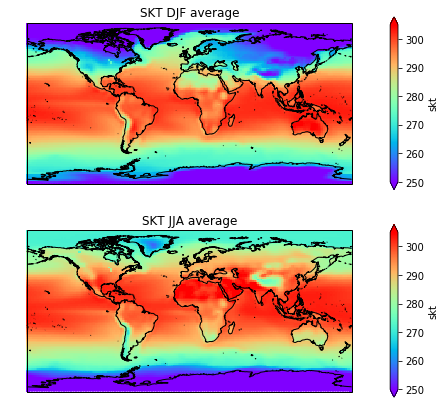

In [47]:
# 2-panel figure (2 rows, 1 column)
fig = plt.figure(figsize=(8,7))

ax1 = fig.add_subplot(2,1,1, projection=ccrs.PlateCarree())
skt_djf_avg.plot.pcolormesh(ax=ax1, transform=ccrs.PlateCarree(), cmap='rainbow', vmin=250, vmax=305)
ax1.coastlines('50m')
# ax1.add_feature(states_provinces, edgecolor='black')
# ax1.add_feature(cfeature.BORDERS)
ax1.set_title('SKT DJF average')

ax2 = fig.add_subplot(2,1,2, projection=ccrs.PlateCarree())
skt_jja_avg.plot.pcolormesh(ax=ax2, transform=ccrs.PlateCarree(), cmap='rainbow', vmin=250, vmax=305)
ax2.coastlines('50m')
#ax2.add_feature(states_provinces, edgecolor='black')
#ax2.add_feature(cfeature.BORDERS)
ax2.set_title('SKT JJA average')

<span style="color:red; font-size:20px; font-weight:bold">In-class exercise</span>

1. Calculate spring (MAM) and fall (SON) mean temperatures from the NCEP-2 reanalysis.
2. Convert temperatures from unit Kelvin to Fahrenheit.
2. Create a two-panel plot (2 rows and 1 column) displaying MAM and SON average temperatures over the US. 